# Linear Regression

In [26]:
from __future__ import division

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [28]:
%matplotlib inline 

In [29]:
sns.set_style("white")
sns.set_style("ticks")
sns.set_context("talk")

In [30]:
def normalize_data(x):
    # normalizaing such that data has mean 0 and std of 1
    mu = x.mean()
    sigma = x.std()
    x = (x - mu) / sigma
    return (x, mu, sigma)

def add_column_ones(x):
    if np.isscalar(x):
        x = np.array((1, x))
    else:
        x = np.vstack((np.ones((x.shape[0],)), x)).T
    return x

def compute_cost(x, y, theta):
    theta = theta.reshape((len(theta), 1))
    pred = np.dot(x, theta)
    J = np.mean((pred - y) ** 2) / 2
    return J

def gradient_descent(X, y, M, theta_0, alpha, num_iters):
    J_history = np.zeros(num_iters)
    theta = theta_0.copy()
    for i in xrange(num_iters):
        J_history[i] = compute_cost(X, y, theta)
        theta -= alpha / M * (theta.dot(X.T) - y).dot(X)
    return theta, J_history

def prediction(theta, x, mu = 0, sigma = 1):
    theta = theta.reshape((len(theta), 1))
    x = (x - mu) / sigma
    x = add_column_ones(x)
    pred = np.dot(x, theta)
    return pred

Load the dataset.

In [31]:
#data = np.loadtxt('ex1_orig_octave/ex1data1.txt', delimiter=',')
data = np.loadtxt('/home/sheraz/data/cognets/auto/data_ex1.csv', delimiter=',')
x = data[:, 0] 
y = data[:, 1]


x_normalized, mu, sigma = normalize_data(x)

M = len(y) 

## 2.1 Plotting the data.

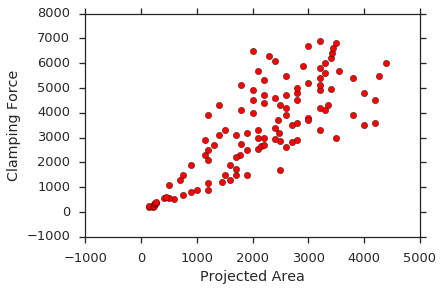

In [32]:
plt.figure()
plt.scatter(x, y, c='r', marker='o', s=40)
plt.xlabel('Projected Area')
plt.ylabel('Clamping Force')

## Gradient descent

Add a column of ones to the data matrix that allows us to treat the intercept parameter as a feature.

In [33]:
X = add_column_ones(x_normalized)
print(X[:5])

[[ 1.         -0.4345206 ]
 [ 1.         -0.35819881]
 [ 1.         -0.42986683]
 [ 1.         -1.45834943]
 [ 1.         -1.55142478]]


Inialize each of the two model parameters to zero. 

In [34]:
theta_0 = np.zeros(X.shape[1])

In [35]:
print 'Initial cost: %.3f' % compute_cost(X, y, theta_0)

Initial cost: 7466581.541


Define hyperparameters for batch gradient descent.

In [36]:
num_iters = 15000
alpha = 0.001

In [37]:
theta, J_history = gradient_descent(X, y, M, theta_0, alpha, num_iters)

In [38]:
print "Theta found by gradient descent: %.3f, %.3f" % (theta[0], theta[1])

Theta found by gradient descent: 3391.423, 1453.148


Plot cost vs. steps.

(0, 7839910.6179843778)

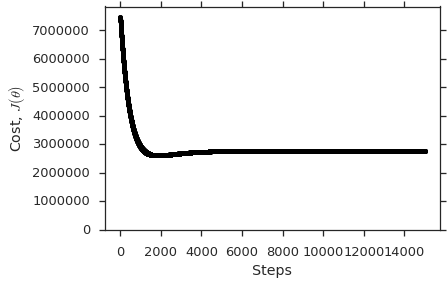

In [39]:
plt.figure()
plt.scatter(np.arange(num_iters), J_history, c='k', marker='o')
plt.xlabel('Steps')
plt.ylabel('Cost, ' + r'$J(\theta)$')
plt.xlim(-num_iters * 0.05, num_iters * 1.05)
plt.ylim(0, max(J_history) * 1.05)

Define a function that returns the model prediction for profit given the population level and model parameters.

Compare training data with linear regression predictions.

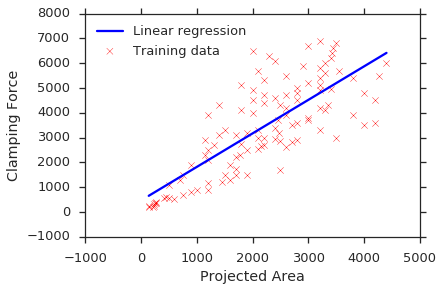

In [40]:
plt.figure()
plt.scatter(x, y, c='r', marker='x', s=40, label='Training data')
x_range = np.linspace(min(x), max(x), 100)
#print( prediction(theta, x_range, mu, sigma).shape, x_range.shape)
plt.plot(x_range, prediction(theta, x_range, mu, sigma), 'b-', label='Linear regression')
plt.xlabel('Projected Area')
plt.ylabel('Clamping Force')
plt.legend(numpoints=1, loc=0)

Extrapolate.

In [41]:
population = 3.5
print 'For projected area = %d, we predict a clamping force of %0.2f.' \
    % (population * 1e4, prediction(theta, population, mu, sigma) * 1e4)

population = 7.0
print 'For projected area = %d, we predict a clamping force %0.2f.' \
    % (population * 1e4, prediction(theta, population, mu, sigma) * 1e4)

For projected area = 35000, we predict a clamping force of 4654450.30.
For projected area = 70000, we predict a clamping force 4701788.60.


## Visualizing the cost function

In [42]:
num_pts = 100
theta_0_low, theta_0_high = theta[0]-10000, theta[0]+10000
theta_1_low, theta_1_high = theta[1]-10000, theta[1]+10000

theta_0_pts = np.linspace(theta_0_low, theta_0_high, num_pts)
theta_1_pts = np.linspace(theta_1_low, theta_1_high, num_pts)
theta_0_mesh, theta_1_mesh = np.meshgrid(theta_0_pts, theta_1_pts)

cost_mesh = np.array([compute_cost(X, y, np.array([theta_0, theta_1])) for theta_0, theta_1 \
                      in zip(theta_0_mesh.ravel(), theta_1_mesh.ravel())]).reshape(theta_0_mesh.shape)

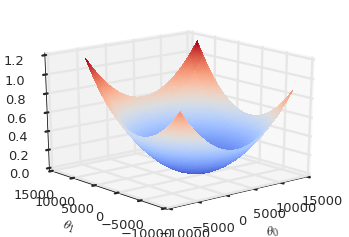

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(theta_0_mesh, theta_1_mesh, cost_mesh, 
                rstride=1, cstride=1, cmap=plt.cm.coolwarm, linewidth=0, antialiased=False)
ax.set_xlabel(r'$\theta_0$', labelpad=15)
ax.set_ylabel(r'$\theta_1$', labelpad=15)
ax.set_zlabel('Cost, ' + r'$J(\theta)$', labelpad=15)
ax.view_init(elev=20., azim=230)

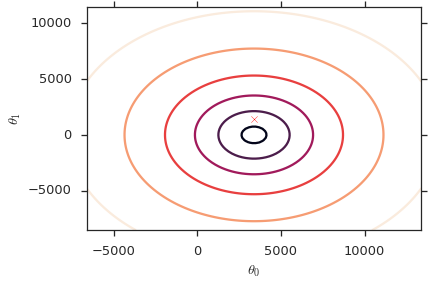

In [44]:
plt.figure()
plt.contour(theta_0_mesh, theta_1_mesh, np.log10(cost_mesh))
plt.scatter(theta[0], theta[1], c='r', marker='x', s=40)
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.xlim(theta_0_low, theta_0_high)
plt.ylim(theta_1_low, theta_1_high)

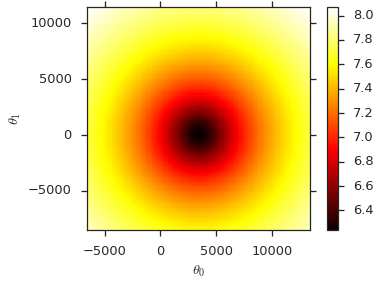

In [45]:
plt.figure()
plt.imshow(np.log10(cost_mesh), extent=[theta_0_low, theta_0_high, theta_1_low, theta_1_high], cmap=plt.get_cmap('hot'), interpolation='nearest', origin='lower')
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.colorbar()